### Проблема качества данных

#### Обучение без чистки

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Удаляем категориальные переменные

In [9]:
df_without_categorical_fetures = df[["PassengerId", "Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]]
df_without_categorical_fetures

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [10]:
df_without_categorical_fetures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


Теперь удалим все строки в которых хотя бы одно значение пусто в столбце Age (потому что только там есть пустые значения)

In [13]:
df_without_categorical_fetures_and_nan = df_without_categorical_fetures[df_without_categorical_fetures['Age'].notna()]
df_without_categorical_fetures_and_nan

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
889,890,1,1,26.0,0,0,30.0000


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_without_categorical_fetures_and_nan[["PassengerId", "Pclass", "Age", "SibSp", "Parch", "Fare"]],
                                                    df_without_categorical_fetures_and_nan[["Survived"]], test_size=0.2)

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
model.score(X_test, Y_test)

0.7202797202797203

In [251]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])

0.7461506450270495

#### Подготовка данных

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Для предсказания выживаемости пассажиров нам надо отобрать только те факторы которые влияют на выживаемость. 

"PassengerId" - просто порядковый номер пассажира, никакой ценности не несет.

"Survived" - целевой признак.

"Pclass" - уровень комфорта (эконом, комфорт, бизнес-класс), сильно коррелирует с "Fare", так как чем выше уровень комфорта, тем выше стоимость. Поэтому можно оставить "Pclass" для предсказания и надеяться, что от уровня комфорта повышается и уровень безопасности (наличие запасных выходов, возможность пройти на лодку первее эконом класса, наличие желета и тп).

"Name" - имя пассажира никак не влияет на выживаемость.

"Sex" - женщины могли быть более приоритетными при посадке на спасательные шлюпки. Поэтому этот признак вероятно будет полезным.

"Age" - дети могли также быть приоритетными при спасении, но также вероятность что они выживут в океане одни долго была меньше чем у взрослого человека. У пожилых пассажиров вероятность выживаемости меньше.

"SibSp", "Parch" - думаю что наличие братьев/сестер или родителей на корабле не влияет на выживаемость пассажира.

"Ticket" - билет может быть полезен в том случае если мы понимаем какие данные в него включены и как мы можем их использовать - если это рандомные значения то нам они не принесут пользы. Поэтому не включаем.

"Fare" - не будем брать, потому что уже взяли "Pclass"

"Cabin" - рассадка пассажиров может быть полезным фактором. Но в этом поле слишком много пропусков (лишь ~23% заполнено) поэтому этот признак мы также не берем.

"Embarked" - пункт отправления. Думаю что не имеет значения для предсказания выживаемости.

Посмотрим на распредление выживших/погибших по классам комфорта. Из графика видно что в третьем классе большинство погибших, а из первого класса большинство выжило. 

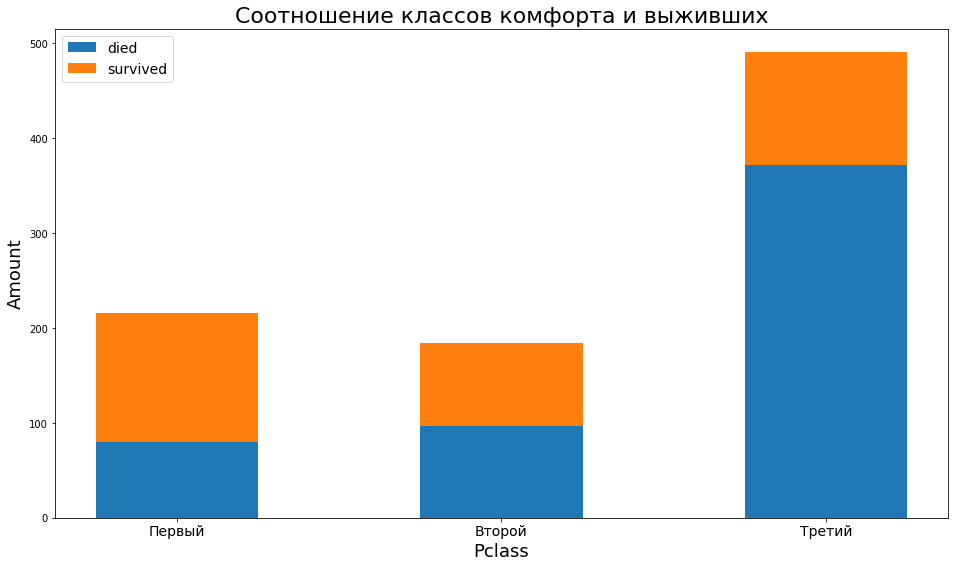

In [96]:
import numpy as np
import matplotlib.pyplot as plt

x_var = 'Pclass'
groupby_var = 'Survived'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]
bins = 5

plt.figure(figsize=(16,9))
plt.hist(vals, bins, stacked=True)

plt.legend(["survived" if group else "died" for group in np.unique(df[groupby_var]).tolist()], fontsize=14)
plt.title("Соотношение классов комфорта и выживших", fontsize=22)
plt.xlabel("Pclass", fontsize=18)
plt.ylabel("Amount", fontsize=18)
plt.xticks(ticks=[1 + 1/bins, 2, 3 - 1/bins], labels=["Первый", "Второй", "Третий"], fontsize=14)

plt.show()

Теперь посмотрим как гендер влиял на выживаемость. Женщин на корабле было меньше чем мужчин и женщины выживали чаще мужчин. Значит теория о том что женщинам уступали места скорее всего верна.

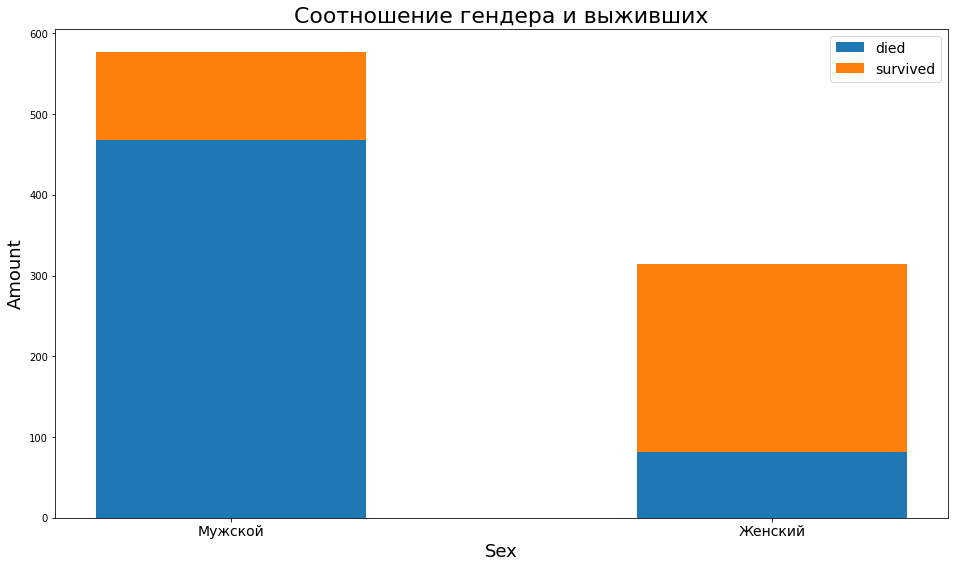

In [106]:
x_var = 'Sex'
groupby_var = 'Survived'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]
bins = 3

plt.figure(figsize=(16,9))
plt.hist(vals, bins, stacked=True)

plt.legend(["survived" if group else "died" for group in np.unique(df[groupby_var]).tolist()], fontsize=14)
plt.title("Соотношение гендера и выживших", fontsize=22)
plt.xlabel("Sex", fontsize=18)
plt.ylabel("Amount", fontsize=18)
plt.xticks(ticks=[0 + 1/bins/2, 1 - 1/bins/2], labels=["Мужской", "Женский"], fontsize=14)

plt.show()

Теперь посмотрим влияние возраста на выживаемость. Как видно особо различий в графиках нет.

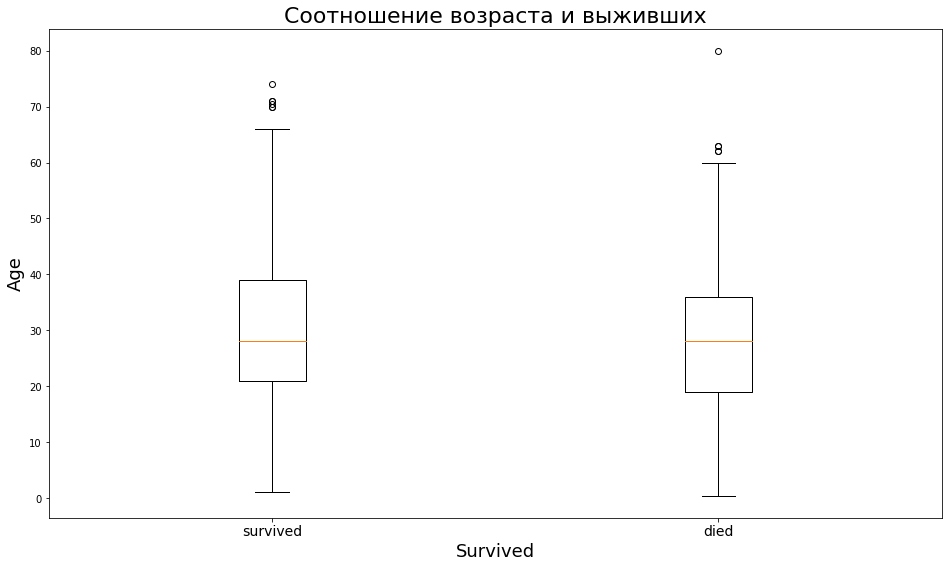

In [139]:
x_var = 'Age'
groupby_var = 'Survived'

not_nan_df = df[df['Age'].notna()]
df_agg = not_nan_df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [not_nan_df[x_var].values.tolist() for i, not_nan_df in df_agg]
bins = len(vals)

plt.figure(figsize=(16,9))
plt.boxplot(vals)

plt.title("Соотношение возраста и выживших", fontsize=22)
plt.xlabel("Survived", fontsize=18)
plt.ylabel("Age", fontsize=18)
plt.xticks(ticks=[1, 2], labels=["survived", "died"], fontsize=14)

plt.show()

Посмотрим на распредление возрастов по классам комфорта. Видно в третьем классе в среднем находились более молодые, а в первом более зрелые пассажиры. А так как в третьем классе больше всего смертей то получается возраст вероятно имеет отрицтельную корреляцию с выживаемостью.

Также на графике можно заметить выбросы в возрасте для второго и третьего класса, но это не существенно. Так как эти выбросы не больше максимального физиологического возраста человека (максимальный возраст по датасету 80, что вполне нормально). Если бы выбросы были больше 200, то их нужно было бы удалить. 

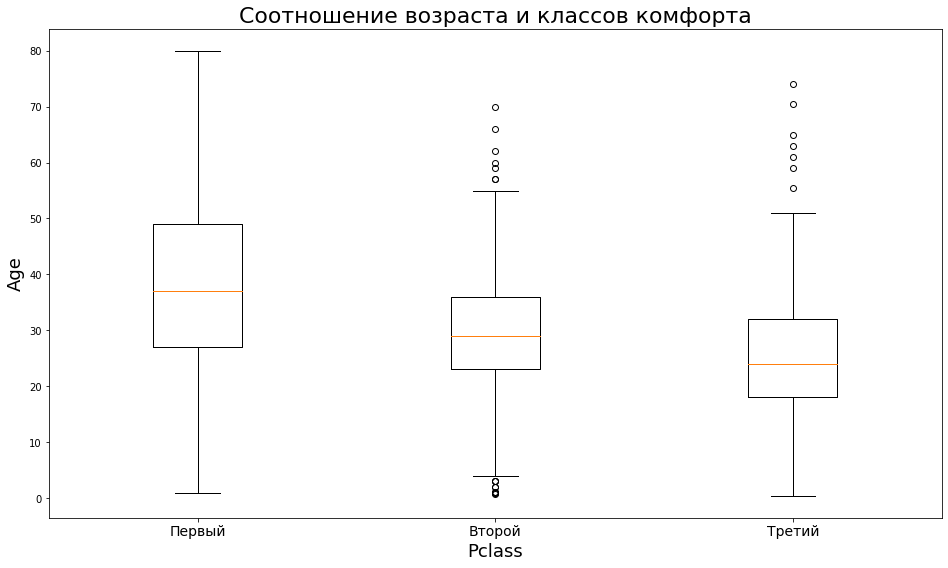

In [253]:
x_var = 'Age'
groupby_var = 'Pclass'

not_nan_df = df[df['Age'].notna()]
df_agg = not_nan_df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [not_nan_df[x_var].values.tolist() for i, not_nan_df in df_agg]
bins = len(vals)

plt.figure(figsize=(16,9))
plt.boxplot(vals)

plt.title("Соотношение возраста и классов комфорта", fontsize=22)
plt.xlabel("Pclass", fontsize=18)
plt.ylabel("Age", fontsize=18)
plt.xticks(ticks=[1, 2, 3], labels=["Первый", "Второй", "Третий"], fontsize=14)

plt.show()

Посмотрим на соотношение пунктов отправлений и выживших. Большинство зашли на корабль в пункте S. пассажирпова из Q гораздо меньше. Какой-то закономерности не видно. Поэтому этот признак в расчет не берем. (Верно?)

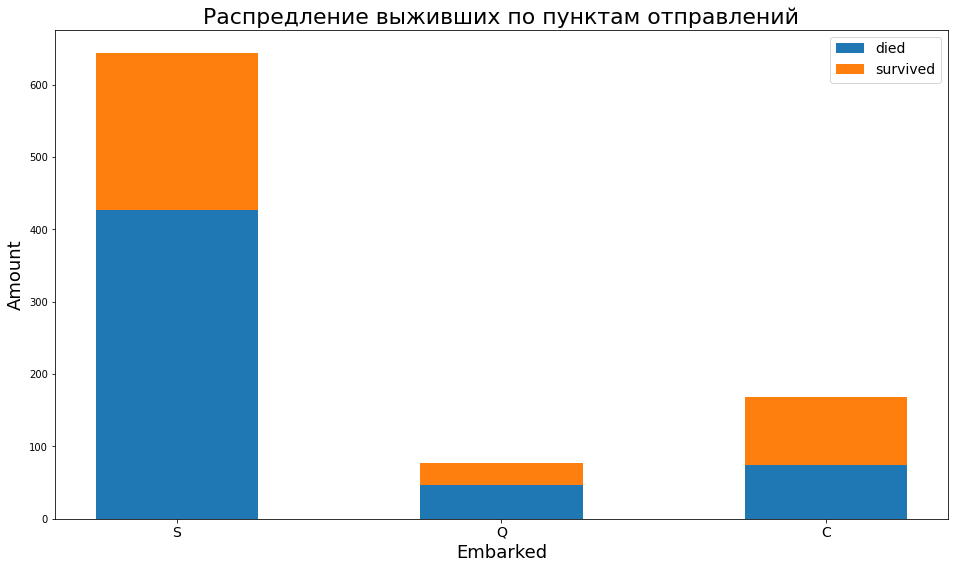

In [159]:
x_var = 'Embarked'
groupby_var = 'Survived'

not_nan_embarked_df = df[df['Embarked'].notna()]
df_agg = not_nan_embarked_df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [not_nan_embarked_df[x_var].values.tolist() for i, not_nan_embarked_df in df_agg]
bins = 5

plt.figure(figsize=(16,9))
plt.hist(vals, bins, stacked=True)

plt.legend(["survived" if group else "died" for group in np.unique(not_nan_embarked_df[groupby_var]).tolist()], fontsize=14)
plt.title("Распредление выживших по пунктам отправлений", fontsize=22)
plt.xlabel("Embarked", fontsize=18)
plt.ylabel("Amount", fontsize=18)
plt.xticks(ticks=[0 + 1/bins, 1, 2 - 1/bins], labels=["S", "Q", "C"], fontsize=14)

plt.show()

На основе наших предположений и графиков можно сформировать оптимальный датасет.

In [233]:
optimal_df = df[["Pclass", "Sex", "Age", "Survived"]]
optimal_df

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0
...,...,...,...,...
886,2,male,27.0,0
887,1,female,19.0,1
888,3,female,NaN,0
889,1,male,26.0,1


Посмотрим на пропуски. Только поле Age имеет пропуски (~20%)

In [234]:
optimal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Survived  891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


Заполнять пустые значения случайным числом, констаной или средним значением у признака Age не особо правильно, так как слишком большой процент пропусков (Например, для признака Embarked мы бы могли заполнить пустые значения модой, так как из пункта S подавляющее большинство пассажиров и в признаке мало пропусков). 

Поэтому найдем все пустые значения в Age, найдем к какому классу комфорта они принадлежат и заполним значения по среднему значению класса комфорта.

Ниже получаем средний возраст по классу

In [230]:
age_group_by_pclass_df = optimal_df.loc[:, ['Age', 'Pclass']].groupby('Pclass')
avg_by_calss = [(x['Pclass'].iloc[0], x['Age'].mean()) for i, x in age_group_by_pclass_df]
avg_by_calss

[(1, 38.233440860215055), (2, 29.87763005780347), (3, 25.14061971830986)]

Заменяем все пропуски в Age на средние значения по классам

In [236]:
for pclass, avg in avg_by_calss:
  optimal_df.loc[(optimal_df['Pclass'] == pclass) & (optimal_df['Age'].isna()), 'Age'] = avg

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [237]:
optimal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Survived  891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


Преобразуем категориальную переменную Sex (Еще можно через LabelEncoding, по сути получается тоже самое)

In [243]:
optimal_df.loc[optimal_df['Sex'] == "male", 'Sex'] = 0
optimal_df.loc[optimal_df['Sex'] == "female", 'Sex'] = 1

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Все наши данные обработаны и теперь можно строить модель

In [244]:
optimal_df

,Pclass,Sex,Age,Survived
0,3,0,22.00000,0
1,1,1,38.00000,1
2,3,1,26.00000,1
3,1,1,35.00000,1
4,3,0,35.00000,0
...,...,...,...,...
886,2,0,27.00000,0
887,1,1,19.00000,1
888,3,1,25.14062,0
889,1,0,26.00000,1


#### Строим модель на подготовленных данных

In [246]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(optimal_df[["Pclass", "Sex", "Age"]],
                                                    optimal_df[["Survived"]], test_size=0.2)

In [247]:
model2 = LogisticRegression()
model2.fit(X_train2, Y_train2)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [248]:
model2.score(X_test2, Y_test2)

0.7988826815642458

In [252]:
roc_auc_score(Y_test2, model2.predict_proba(X_test2)[:, 1])

0.841884328358209

#### Выводы

1. Входе раборты с данными я убирал признаки которые не имели веса для предсказываемого признака, заменял пустые значения из признака Age на среднее значение по классам комфорта и преобразовывал категориальную переменную Sex. Также я высказывал предположения о важности признаков и проверял их с помощью графиков, что помогало обосновано убирать признаки и быть уверенным в выбранных признаках.

2. Первая метрика - ~0.72, вторая метрика - ~0,8. После обработки данных точность предсказаний увеличилась на 8 процентов. Если сравнивать метрики ROC AUC то разница примерно в 10% в пользу обработанных данных.

3. Обработка данных это важный момент. Потому что если данные содержат много пустых значений, сильно отличаются размерности и тп, то это может привести к плохим предсказаниям. Для больших объемов данных также нужно проводить исследование значимости признаков, замену/удаление пустых значений. Так как это повлияет не только на качество модели но и на скорость её обучения. (Если например у нас 10млн строк и 1к признаков, а нам нужно лишь 5 признаков, а отсльное шум, то мы получим не очень хорошие предсказания и будем долго обучать модель чтобы понять это)



#### Вопросы

1. В лекции к этому уроку было сказано что LabelEncoding стоит использовать на тех признаках которые мы может отсортировать по значимости, например, образование школа - 1, бакалавриат - 2, магистратура - 3 и тп. А в остальных случая стоит использовать one-hot encoding. Тогда почему для гендера (в предыдущих практиках) использовали LabelEncoding? Мы же не можем отсортировать по значимости гендер

2. Стоило обратить внимание еще на какие-нибудь столбцы?